In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Description :
The dataset contains 45,000 records and 14 variables and based on loan approval criteria.

| Variable | Description|
| :------- | :------: | 
| person_age | Age of the person | 
| person_gender | Gender of the person | 
| person_education | Highest education level |
| person_emp_exp | Years of employment experience |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) |
| loan_amnt | Loan Amount taken |
| loan_intent | Purpose of the loan |
| Loan interest rate | Loan interest rate|
| cb_person_cred_hist_length | Loan amount as a percentage of annual income |
| loan_percent_income | Length of credit history in years |
| credit_score | Credit score of the person |
| previous_loan_defaults_on_file | Indicator of previous loan defaults |
| loan_status | Loan approval status: 1 = approved; 0 = rejected |

#### Target Variable:
1) Exploratory Data Analysis (EDA): Analyze key features, distribution patterns, and relationships to understand credit risk factors.
2) Classification: Build predictive models to classify the loan_status variable (approved/not approved) for potential applicants.
3) Regression: Develop regression models to predict the credit_score variable based on individual and loan-related attributes.

In [118]:
data = pd.read_csv('loan_data.csv')

In [119]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [122]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [123]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

#### Numerical:
#### -----------------------
1) 'person_age'
2) 'person_income'
3) 'person_emp_exp'
4) 'loan_amnt'
5) 'loan_int_rate'
6) 'loan_percent_income'
7) 'cb_person_cred_hist_length'
8) 'credit_score'
9) 'loan_status'

#### Categorical:
#### ----------------------
1) 'person_gender'
2) 'person_education'
3) 'person_home_ownership'
4) 'loan_intent'
5) 'previous_loan_defaults_on_file'

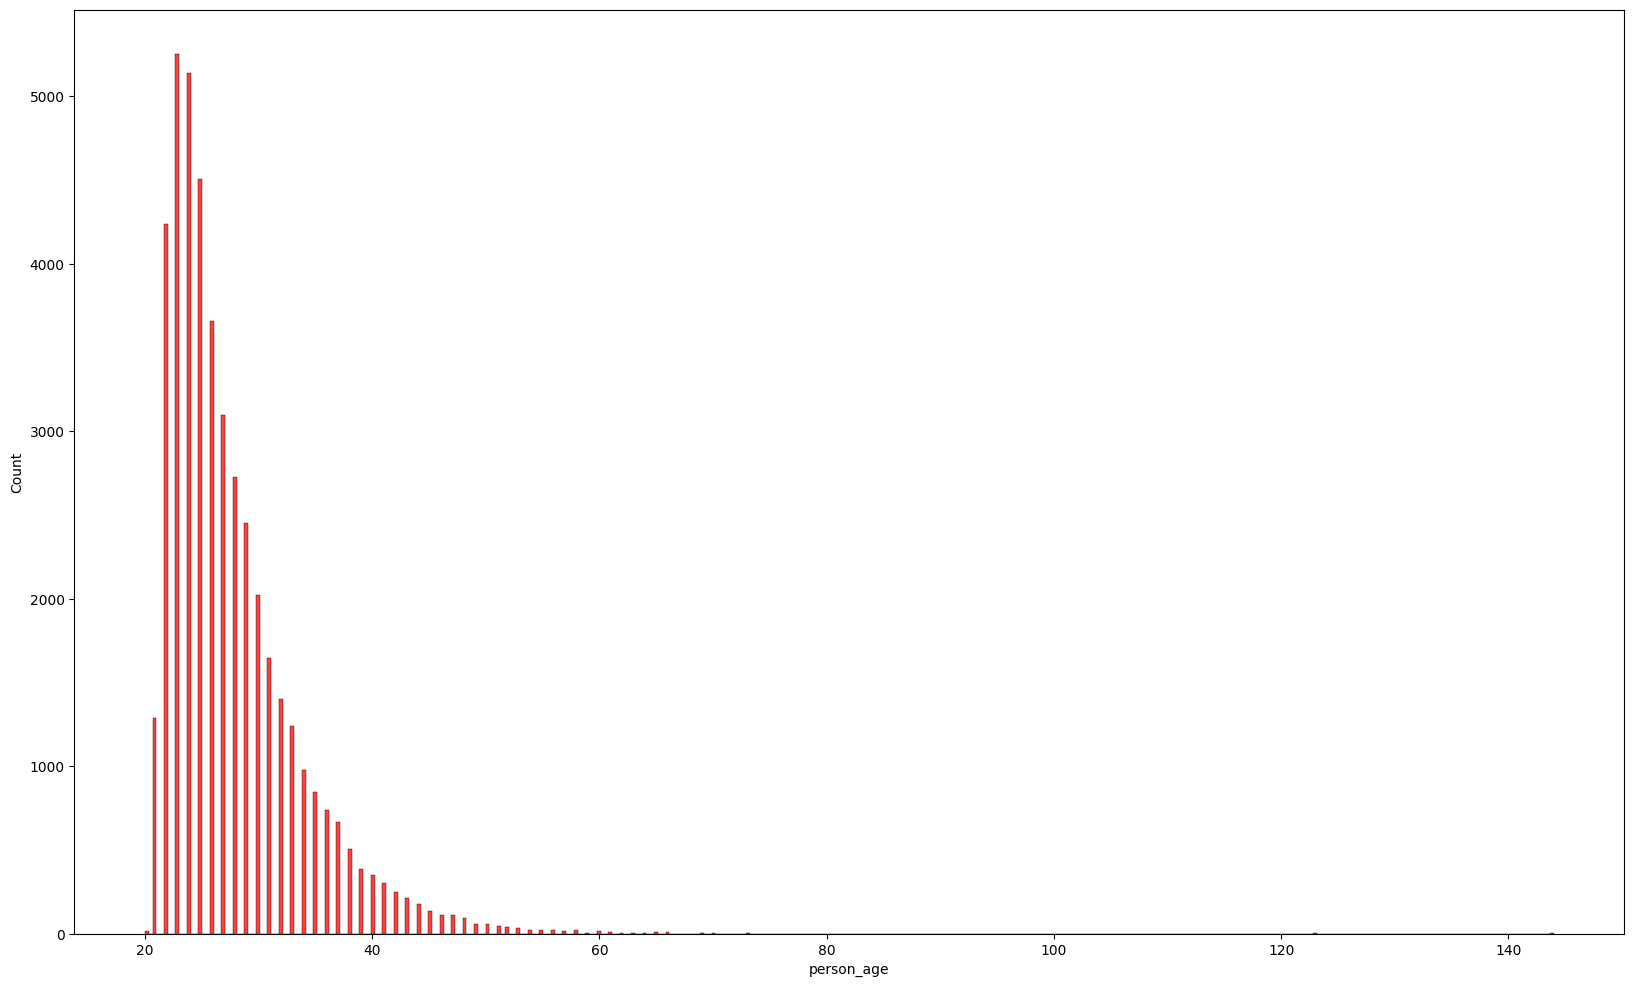

In [39]:
plt.figure(figsize=(20,12)) 
sns.histplot(data=data, x='person_age', color='red')
plt.show()

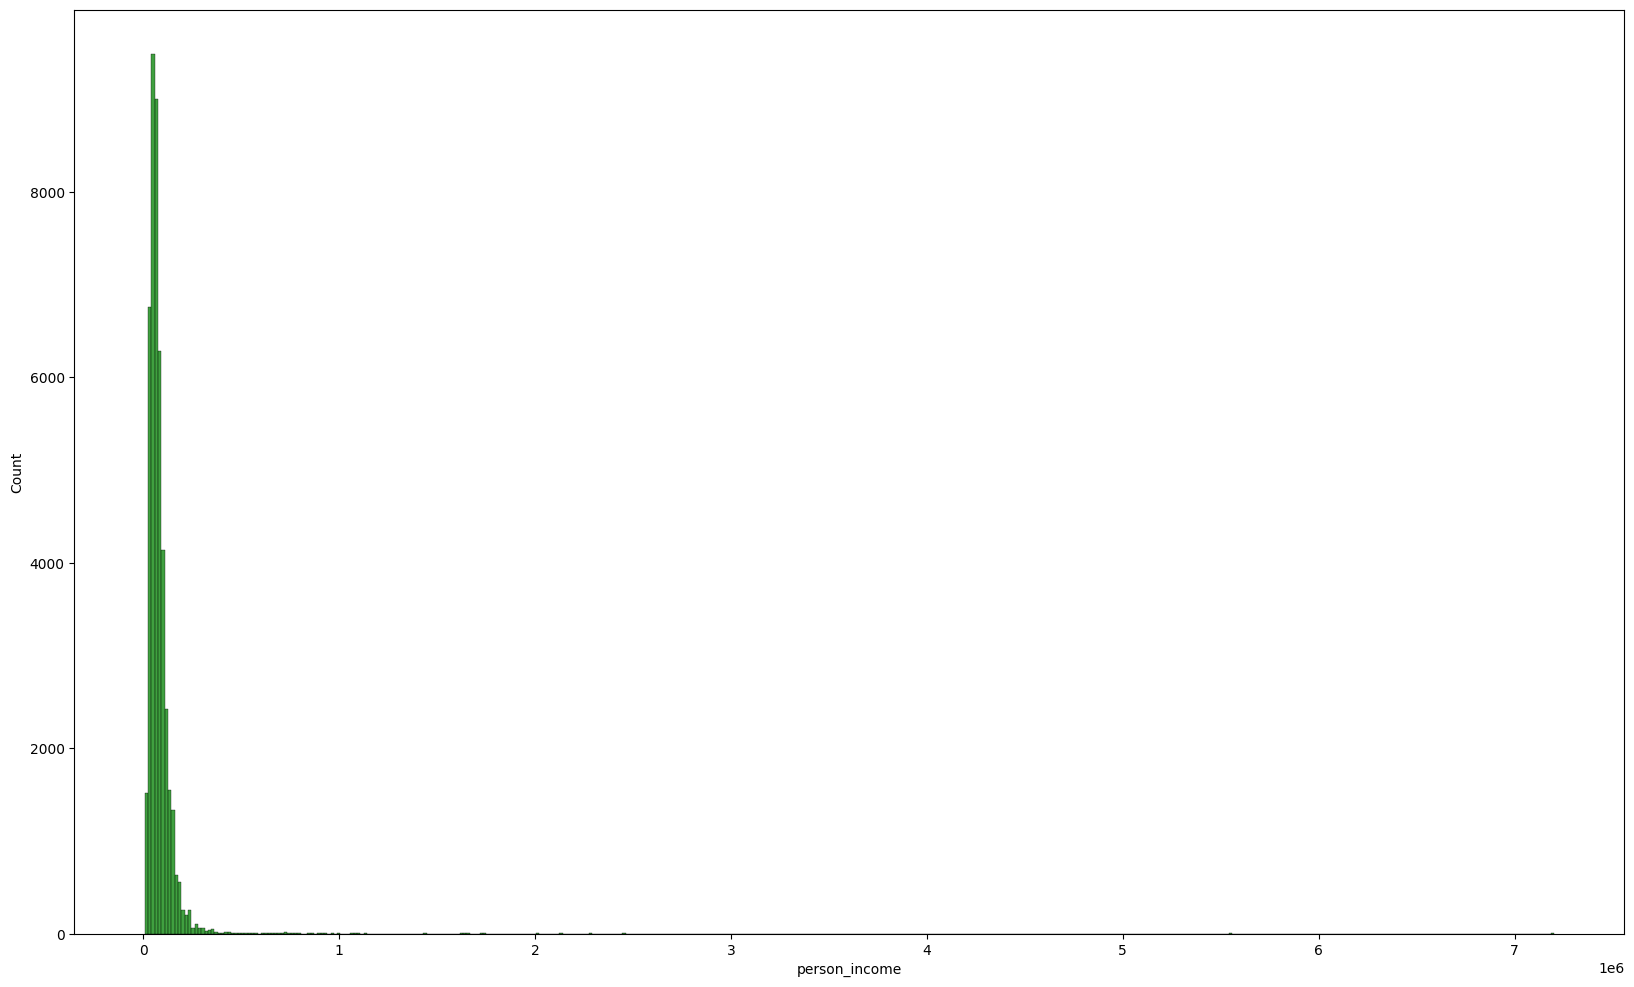

In [124]:
plt.figure(figsize=(20,12))
sns.histplot(data=data, x='person_income', color='green')
plt.show()

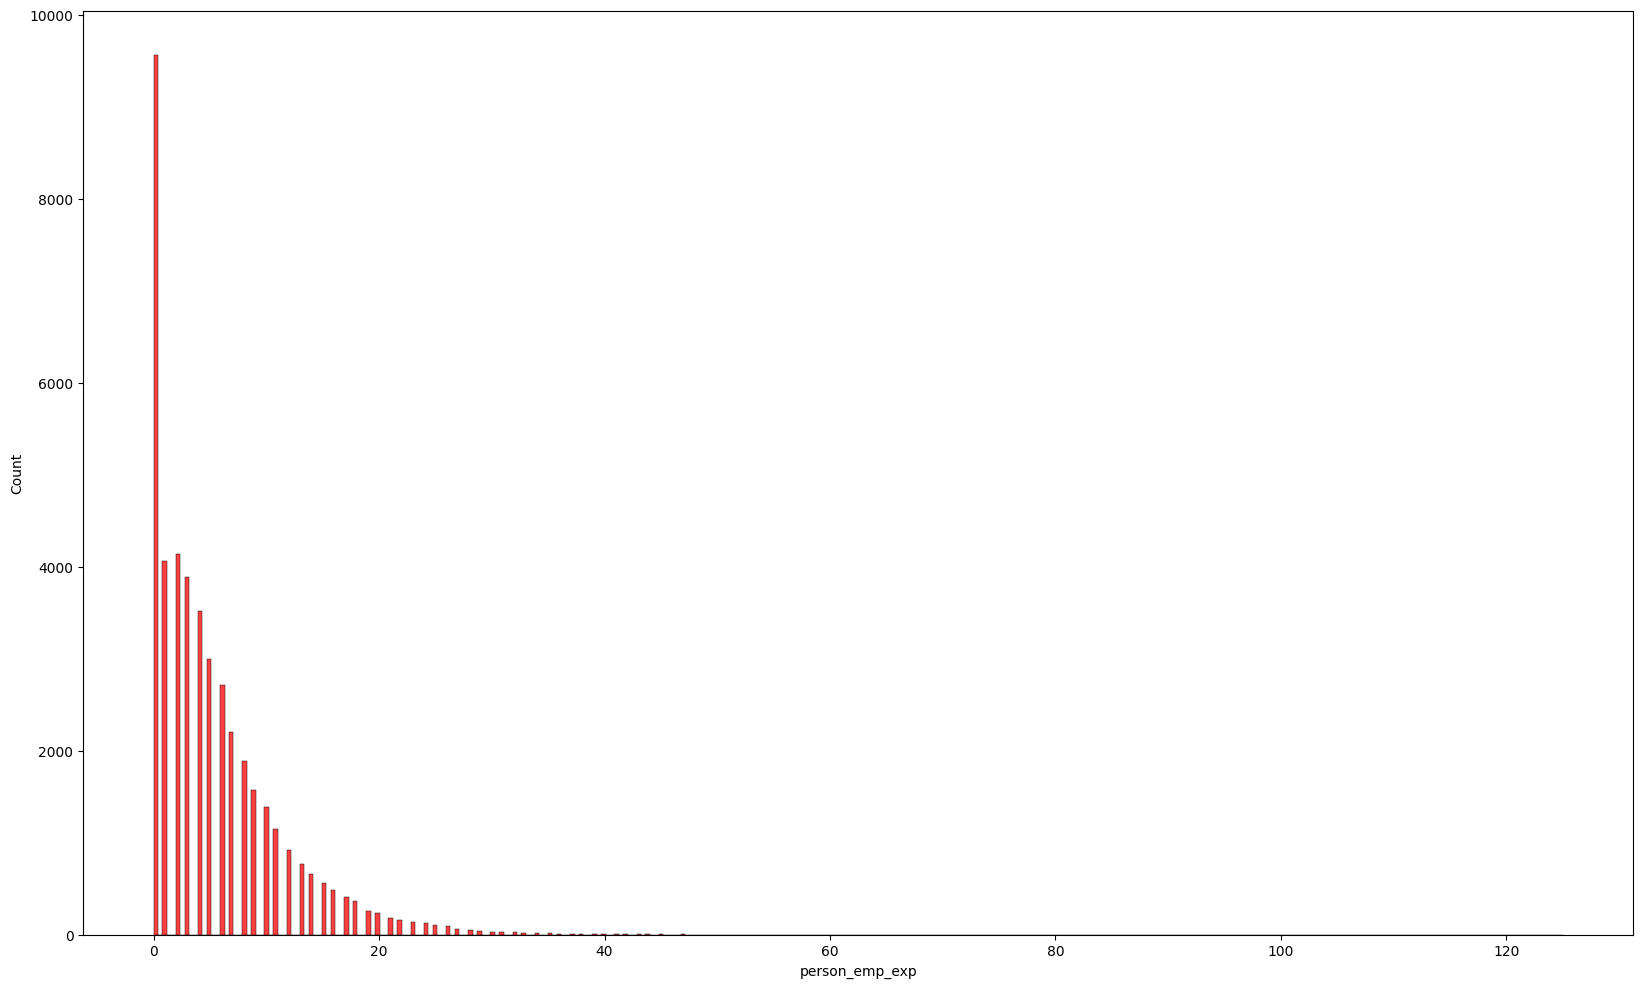

In [126]:
plt.figure(figsize=(20,12))
sns.histplot(data=data, x='person_emp_exp', color='red')
plt.show()

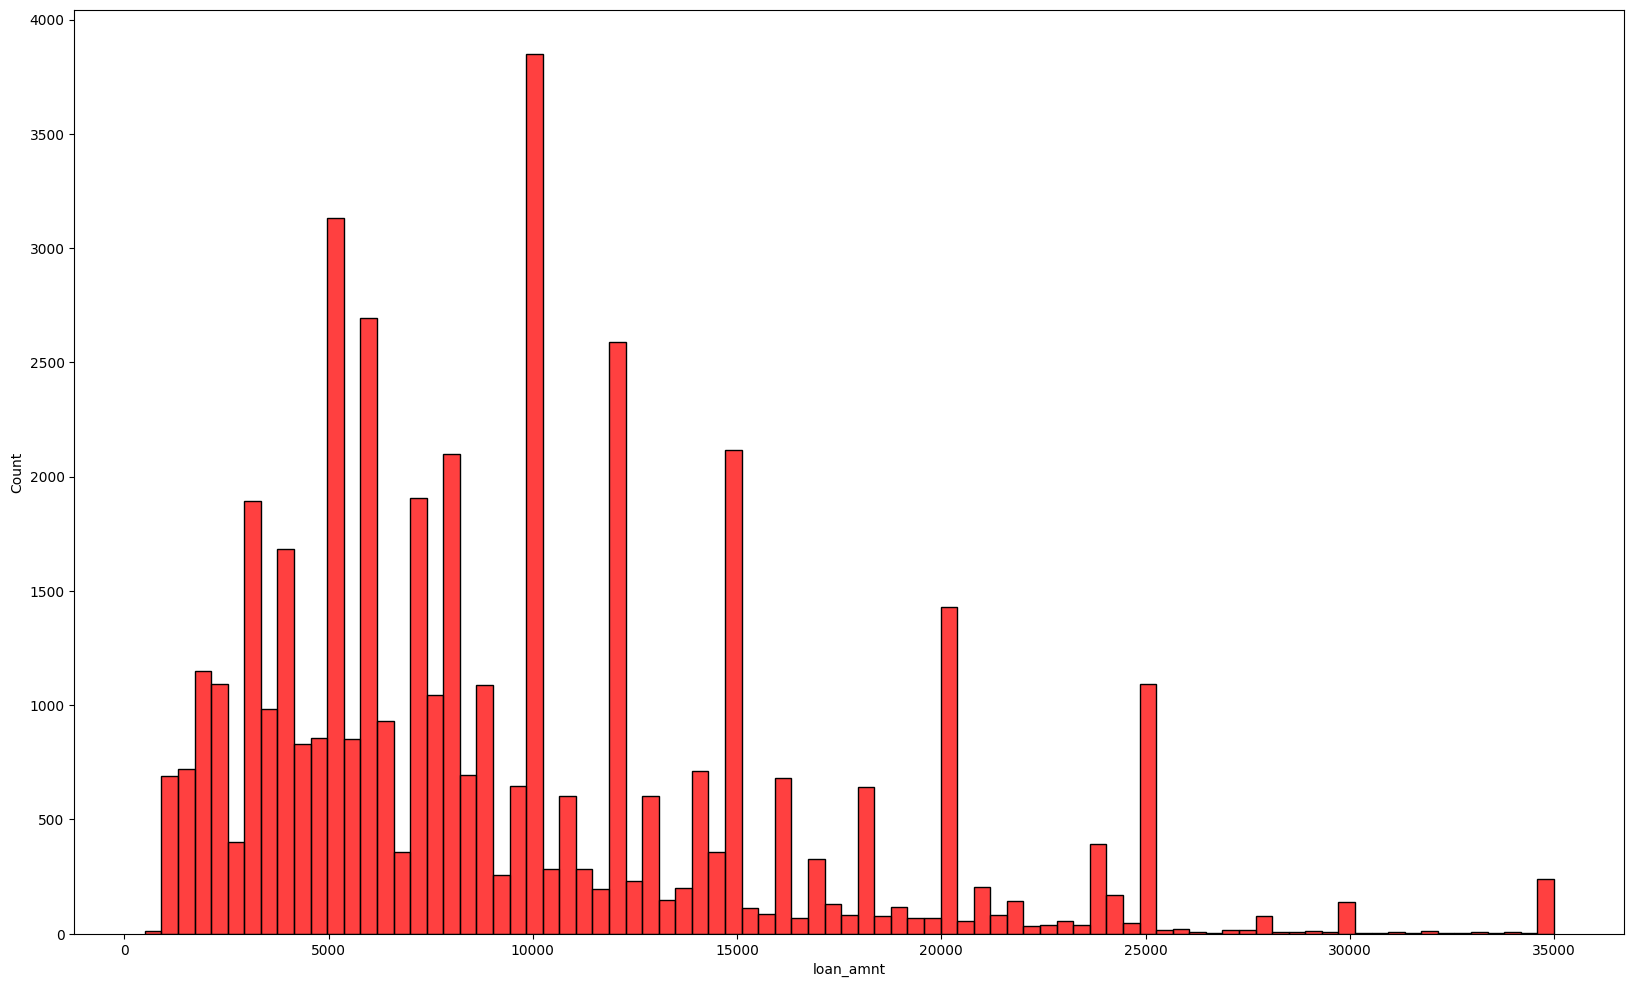

In [20]:
plt.figure(figsize=(20,12))
sns.histplot(data=data, x='loan_amnt', color='red')
plt.show()

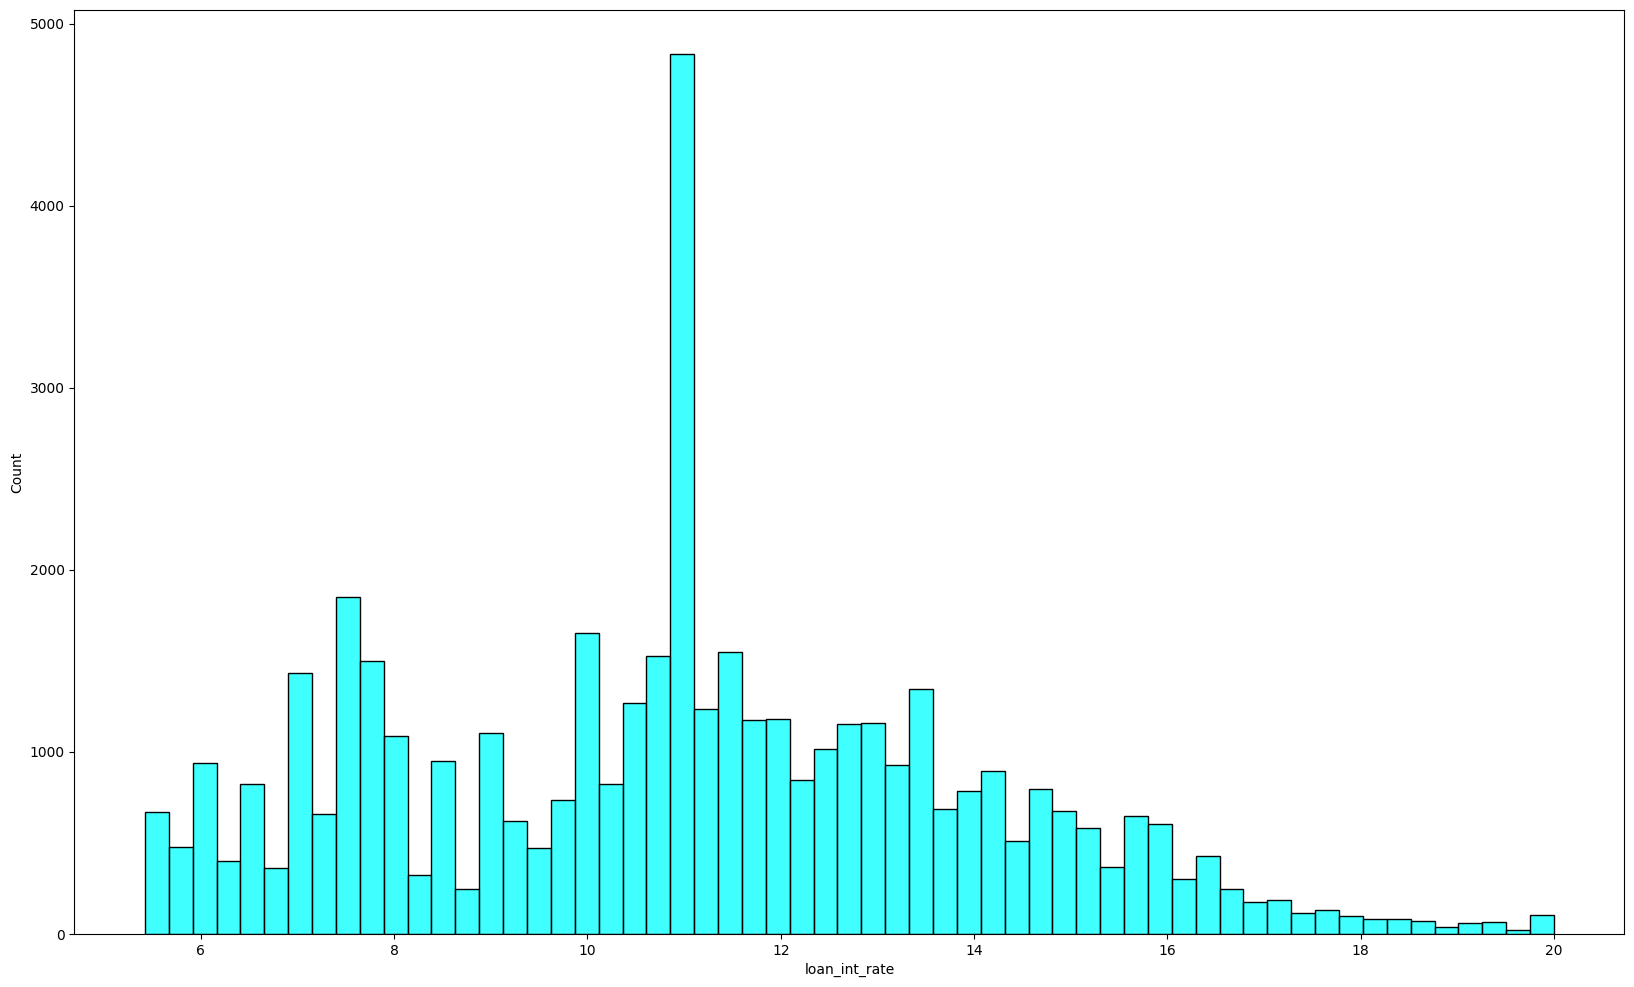

In [22]:
plt.figure(figsize=(20,12))
sns.histplot(data=data, x='loan_int_rate', color='cyan')
plt.show()

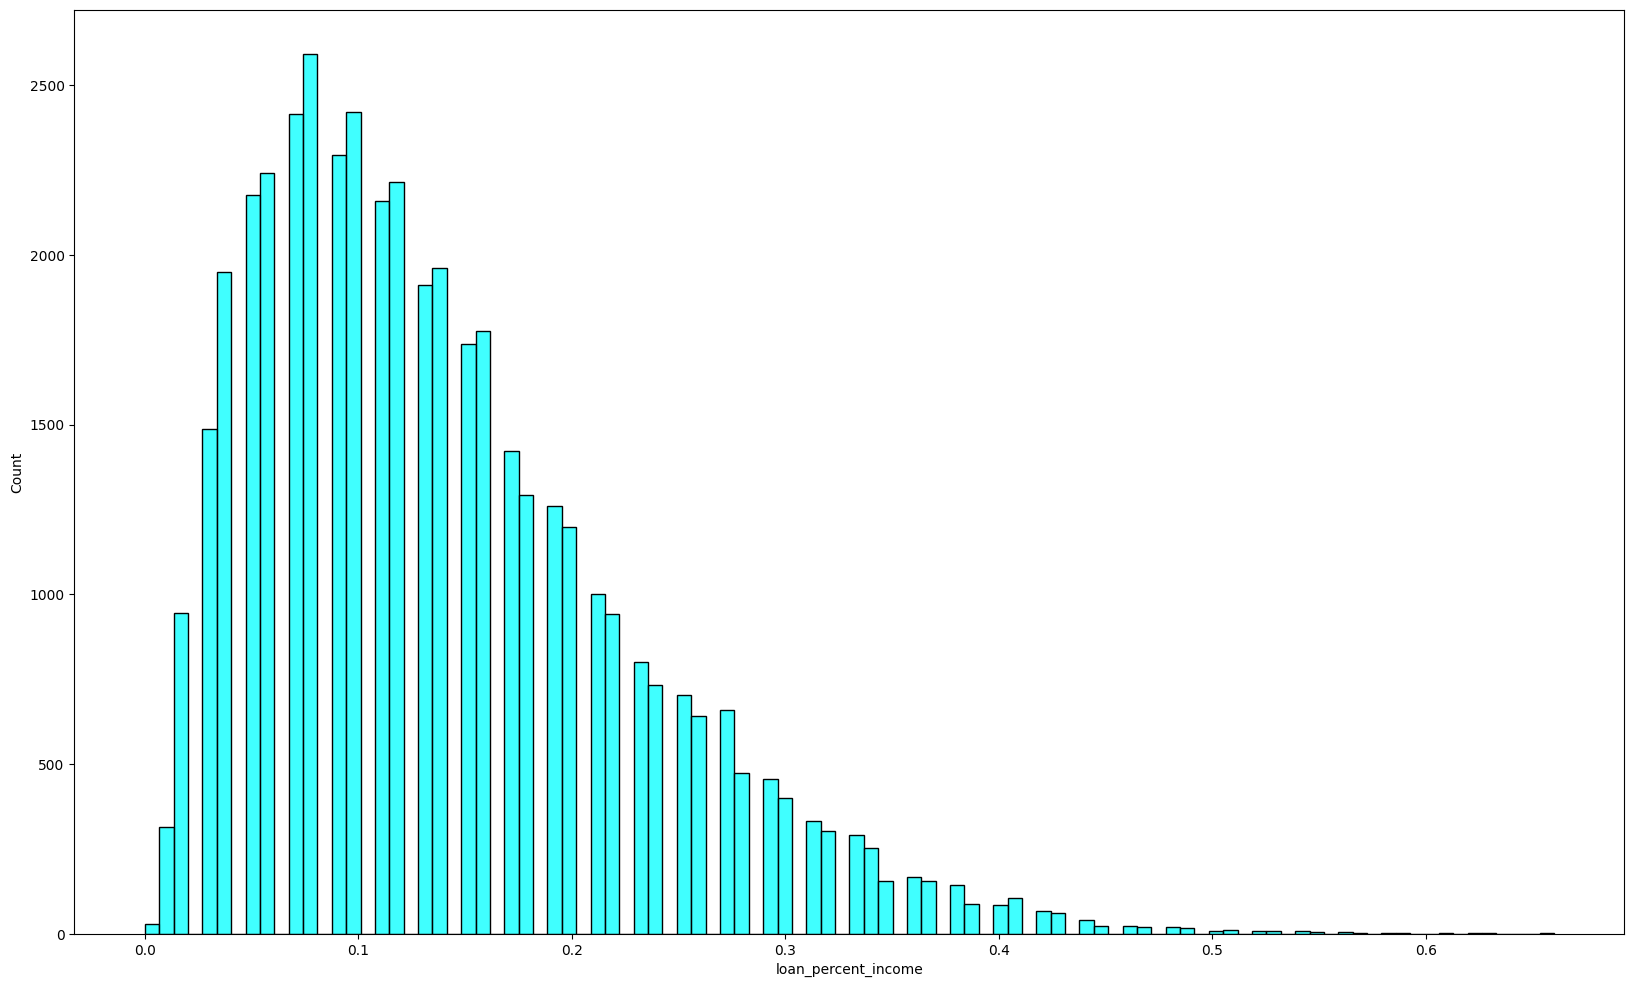

In [23]:

plt.figure(figsize=(20,12))
sns.histplot(data=data, x='loan_percent_income', color='cyan')
plt.show()

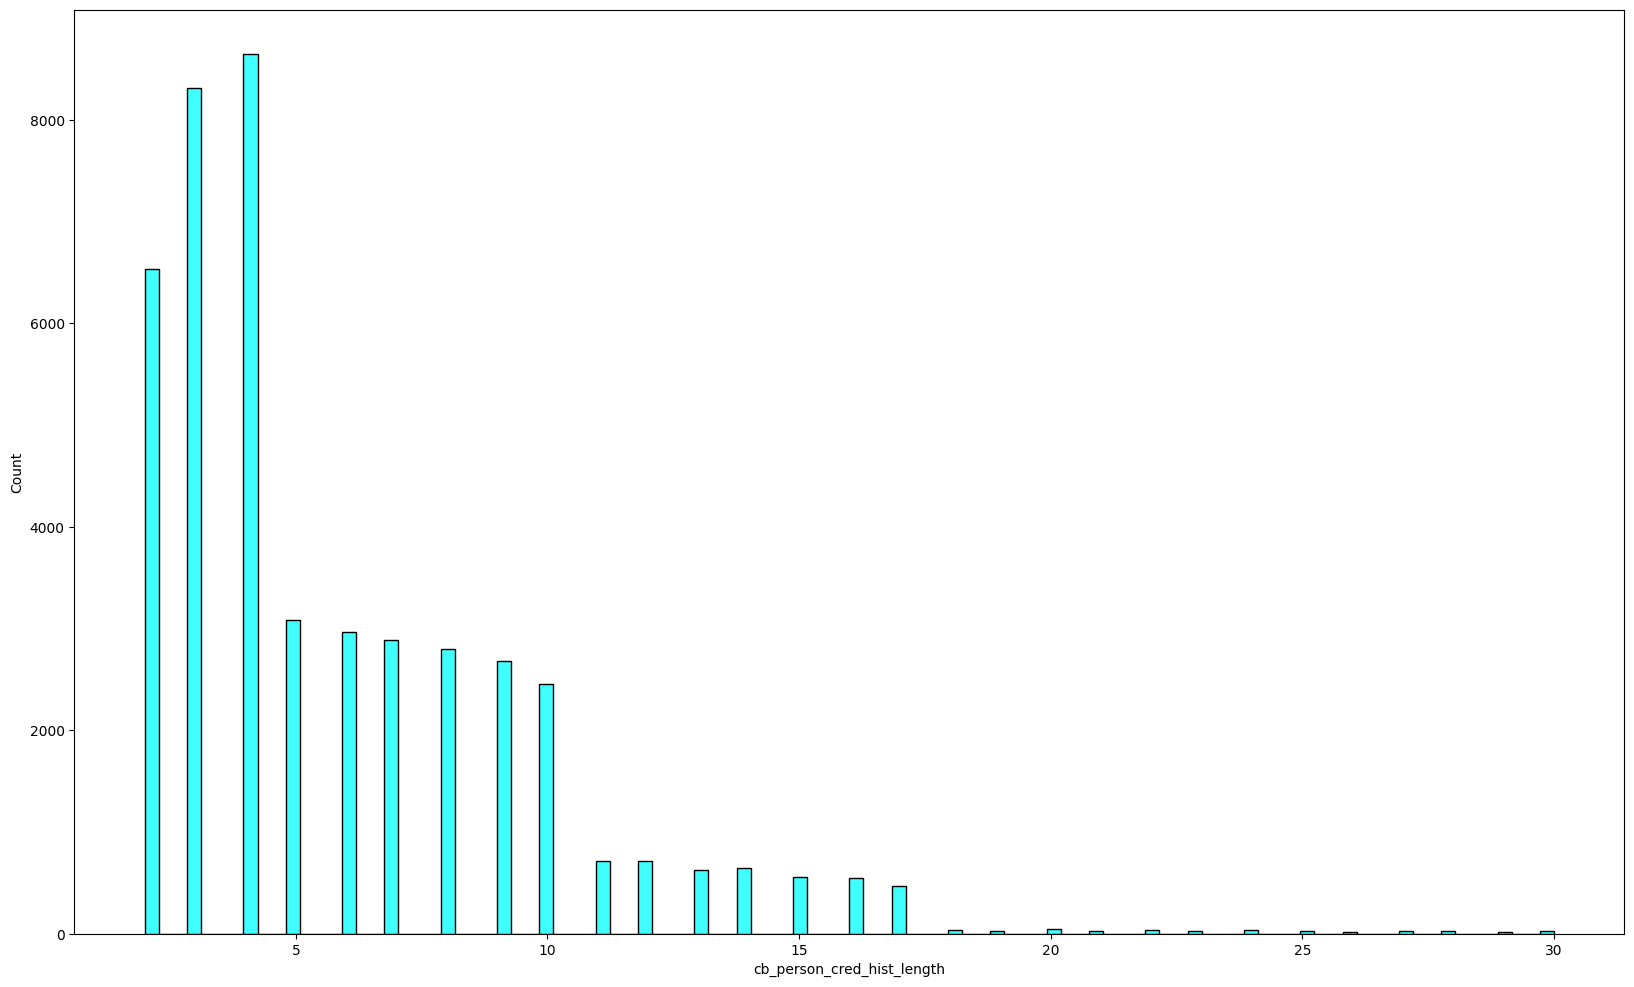

In [24]:
plt.figure(figsize=(20,12))
sns.histplot(data=data, x='cb_person_cred_hist_length', color='cyan')
plt.show()

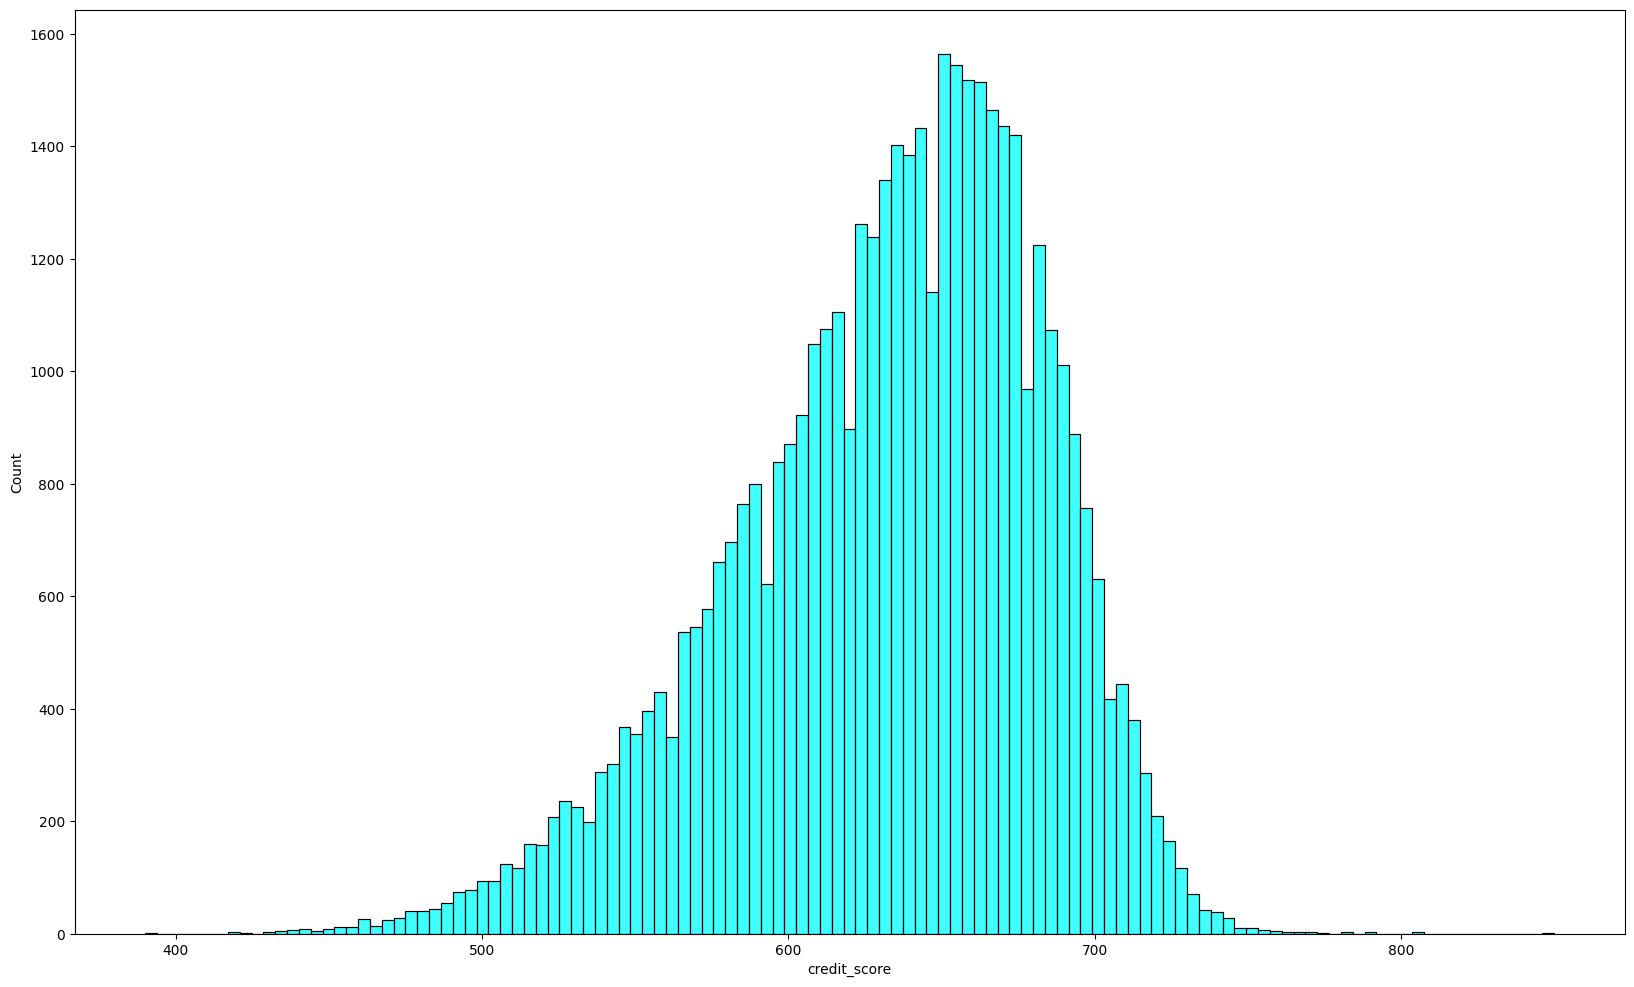

In [26]:

plt.figure(figsize=(20,12))
sns.histplot(data=data, x='credit_score', color='cyan')
plt.show()

In [127]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

<Axes: xlabel='person_age', ylabel='person_income'>

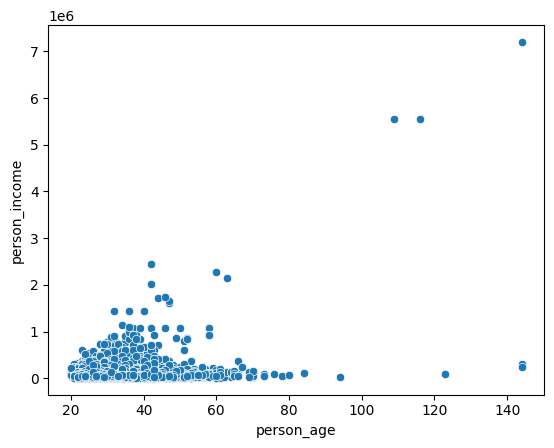

In [129]:
  sns.scatterplot(x="person_age", y="person_income", data=data)

<Axes: xlabel='person_emp_exp', ylabel='person_income'>

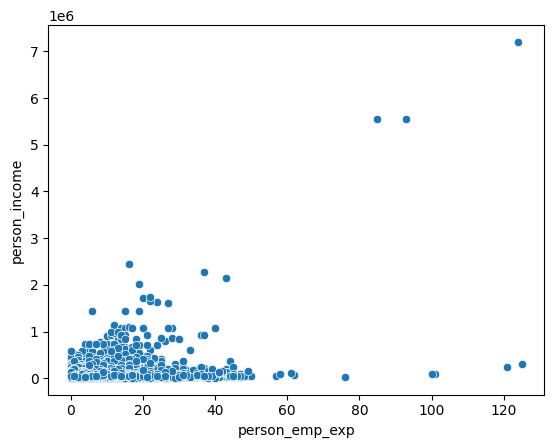

In [130]:
  sns.scatterplot(x="person_emp_exp", y="person_income", data=data)

<Axes: xlabel='loan_amnt', ylabel='person_income'>

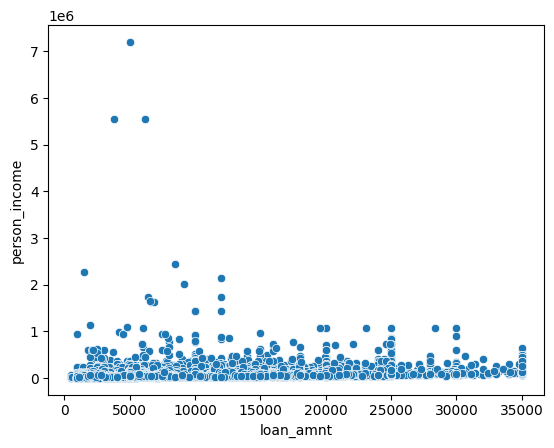

In [131]:
  sns.scatterplot(x="loan_amnt", y="person_income", data=data)

<Axes: xlabel='loan_percent_income', ylabel='person_income'>

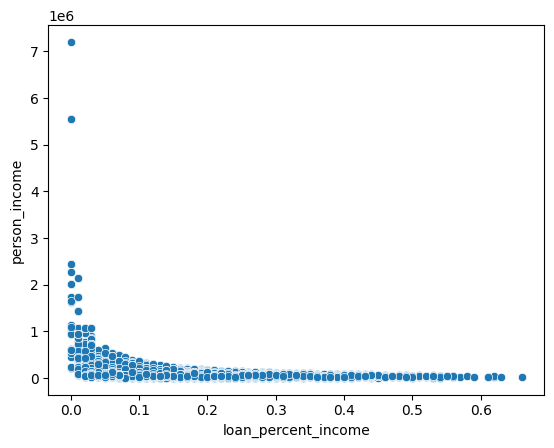

In [45]:
  sns.scatterplot(x="loan_percent_income", y="person_income", data=data)

<Axes: xlabel='cb_person_cred_hist_length', ylabel='person_income'>

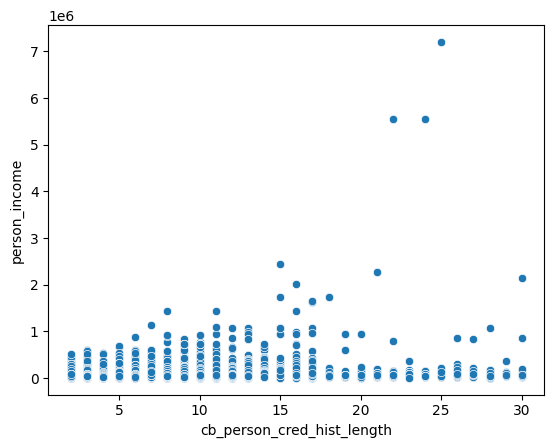

In [46]:
  sns.scatterplot(x="cb_person_cred_hist_length", y="person_income", data=data)

<Axes: xlabel='credit_score', ylabel='person_income'>

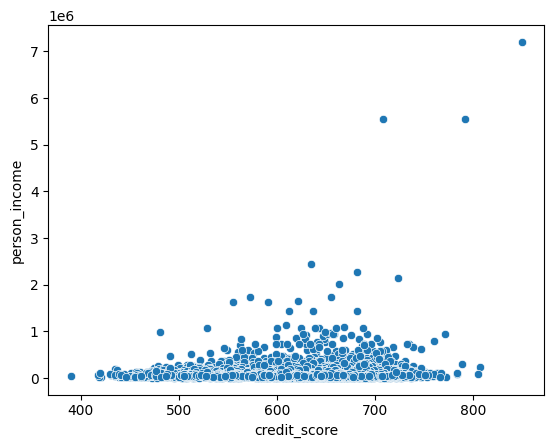

In [47]:
  sns.scatterplot(x="credit_score", y="person_income", data=data)

<Axes: xlabel='credit_score', ylabel='loan_status'>

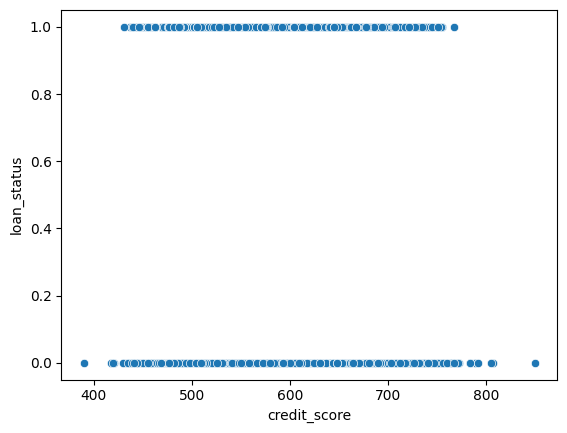

In [132]:
  sns.scatterplot(x="credit_score", y="loan_status", data=data)

In [133]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()

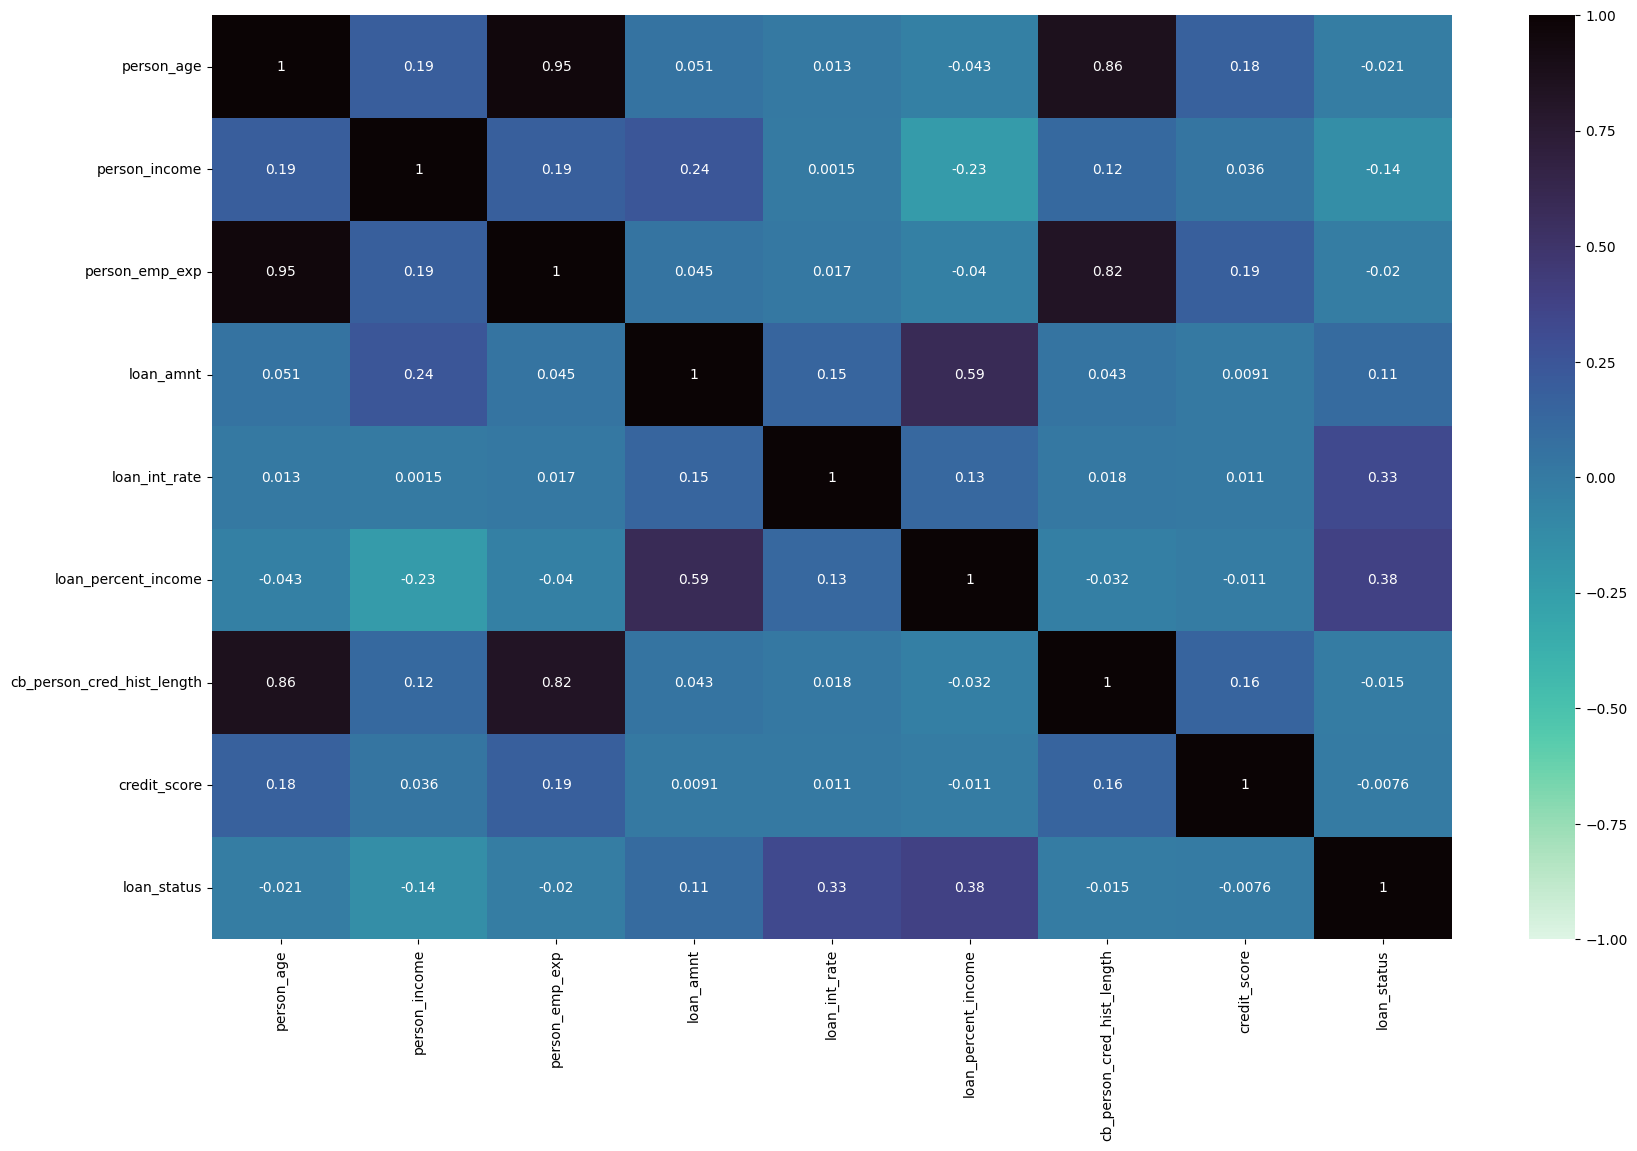

In [134]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, vmin=-1, cmap='mako_r')
plt.show()

In [135]:
cor_target = abs(corr["loan_status"])

In [136]:
cor_target

person_age                    0.021476
person_income                 0.135808
person_emp_exp                0.020481
loan_amnt                     0.107714
loan_int_rate                 0.332005
loan_percent_income           0.384880
cb_person_cred_hist_length    0.014851
credit_score                  0.007647
loan_status                   1.000000
Name: loan_status, dtype: float64

In [138]:
# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

In [139]:
print(relevant_features)

loan_int_rate          0.332005
loan_percent_income    0.384880
loan_status            1.000000
Name: loan_status, dtype: float64


In [62]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [143]:
from sklearn.preprocessing import OrdinalEncoder

In [141]:
data['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [142]:
data['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [65]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [66]:
data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [144]:
data['previous_loan_defaults_on_file'].unique()


array(['No', 'Yes'], dtype=object)

In [145]:
oe=OrdinalEncoder()
data[["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]]=oe.fit_transform(data[["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]])

In [146]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,4.0,71948.0,0,3.0,35000.0,4.0,16.02,0.49,3.0,561,0.0,1
1,21.0,0.0,3.0,12282.0,0,2.0,1000.0,1.0,11.14,0.08,2.0,504,1.0,0
2,25.0,0.0,3.0,12438.0,3,0.0,5500.0,3.0,12.87,0.44,3.0,635,0.0,1
3,23.0,0.0,1.0,79753.0,0,3.0,35000.0,3.0,15.23,0.44,2.0,675,0.0,1
4,24.0,1.0,4.0,66135.0,1,3.0,35000.0,3.0,14.27,0.53,4.0,586,0.0,1


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test =train_test_split(data.drop(columns="loan_status"),
                            data.loan_status,
                            test_size=.20,
                            random_state=100)

In [150]:
x_train.shape

(36000, 13)

In [151]:
x_test.shape

(9000, 13)

In [152]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()

In [153]:
logi.fit(x_train,y_train)

C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [154]:
y_pred = logi.predict(x_test)

In [155]:
from sklearn import datasets, linear_model, metrics

In [156]:
print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 83.77%


In [158]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score

In [159]:
print(confusion_matrix(y_test, y_pred))

[[6603  374]
 [1087  936]]


##### classification_report
- In classification problems in machine learning, a macro-average computes the average of metrics (like precision, recall, F1 score) for each class independently, and then the average of those values is taken.
- Macro Average: When you need to treat all classes equally, regardless of how frequent they are.
- 
Weighted Average: When the class distribution is imbalanced or when certain data points have more significance (e.g., weighted by the size of the sample or their importance)
- In classification problems, a weighted average computes the metrics for each class but adjusts each class’s result by its weight (often based on the frequency or support of the class)..

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6977
           1       0.71      0.46      0.56      2023

    accuracy                           0.84      9000
   macro avg       0.79      0.70      0.73      9000
weighted avg       0.83      0.84      0.82      9000



In [161]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [114]:
auc_score = roc_auc_score(y_test,y_pred)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.70


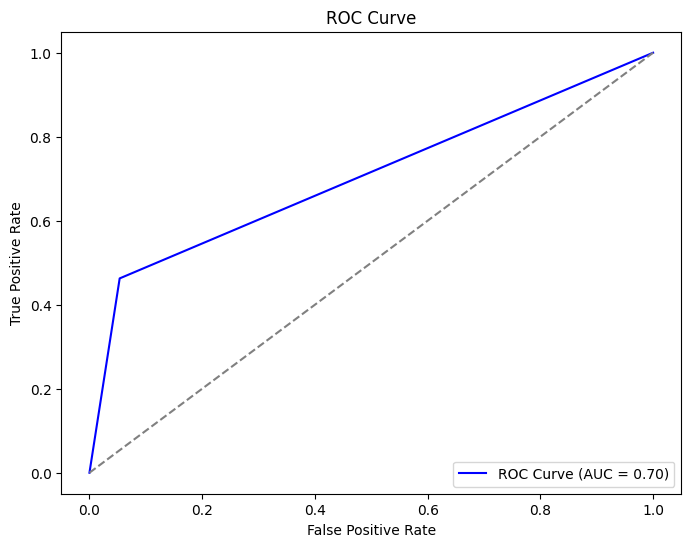

In [116]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
